## Первоначальная идея.

Изначально мы хотели взять датасет для анализа модных тенденций. Но оказалось, что там неудобная кодировка признаков + тяжело выявить целевой признак, поэтому от этой идеи пришлось отказаться в пользу более релевантной.

Ссылки на датасеты:
https://labelme.ru/datasets-catalog/494692309291?ysclid=lgdx1jy7h6124560879
https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset

## Итоговая идея

Для анализа мы взяли готовый датасет "Spotify and Youtube". Он сожержит информацию по популярным трекам в Spotify и их клипам на Youtube.

Основная задача - выявить закономерности между различнами характеристиками треков и их популярностью, танцевальностью и тд. На основе данных будет построена модель машинного обучения, которая будет выявлять эти закономерности и строить прогнозы для новых треков.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [76]:
url = r"C:\Users\acer\Desktop\Spotify_Youtube.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [77]:
df.shape

(20718, 28)

In [78]:
df.drop(['Unnamed: 0', 'Album', 'Album_type', 'Uri', 'Description', 'Licensed', 'official_video', 'Stream', 'Key'], axis = 1, inplace=True)
df.head()

,Artist,Url_spotify,Track,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0


In [79]:
df.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Danceability          2
Energy                2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
dtype: int64

In [80]:
#Почистили от нулей

df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Artist,Url_spotify,Track,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20094,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,0.582,0.926,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0
20095,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,0.531,0.936,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0
20096,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,0.443,0.830,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0
20097,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,0.417,0.767,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20099 non-null  object 
 1   Url_spotify       20099 non-null  object 
 2   Track             20099 non-null  object 
 3   Danceability      20099 non-null  float64
 4   Energy            20099 non-null  float64
 5   Loudness          20099 non-null  float64
 6   Speechiness       20099 non-null  float64
 7   Acousticness      20099 non-null  float64
 8   Instrumentalness  20099 non-null  float64
 9   Liveness          20099 non-null  float64
 10  Valence           20099 non-null  float64
 11  Tempo             20099 non-null  float64
 12  Duration_ms       20099 non-null  float64
 13  Url_youtube       20099 non-null  object 
 14  Title             20099 non-null  object 
 15  Channel           20099 non-null  object 
 16  Views             20099 non-null  float6

<AxesSubplot:>

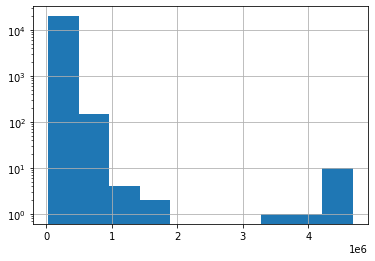

In [84]:
df['Duration_ms'].hist(log=True)

array([[<AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Loudness'}>,
        <AxesSubplot:title={'center':'Speechiness'}>],
       [<AxesSubplot:title={'center':'Acousticness'}>,
        <AxesSubplot:title={'center':'Instrumentalness'}>,
        <AxesSubplot:title={'center':'Liveness'}>],
       [<AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Tempo'}>, <AxesSubplot:>]],
      dtype=object)

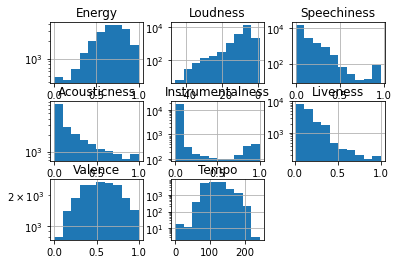

In [110]:
df_features = df[['Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
df_features.hist(log=True)

<AxesSubplot:>

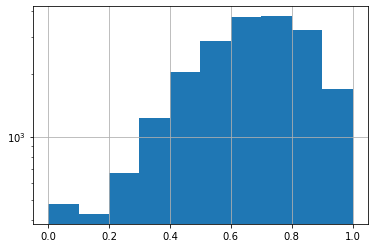

In [106]:
df['Energy'].hist(log=True)

<AxesSubplot:>

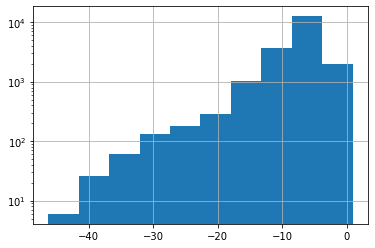

In [96]:
df['Loudness'].hist(log=True)

<AxesSubplot:>

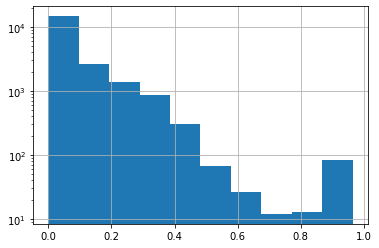

In [107]:
df['Speechiness'].hist(log=True)

<AxesSubplot:>

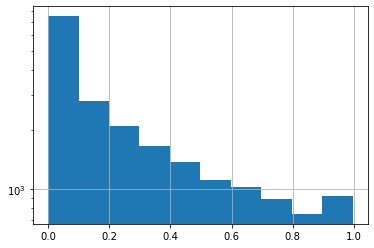

In [98]:
df['Acousticness'].hist(log=True)

<AxesSubplot:>

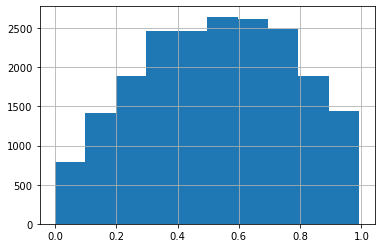

In [102]:
df['Valence'].hist()

In [111]:
df_features.corr()

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Energy,1.000000,0.745120,0.072986,-0.661429,-0.311536,0.172121,0.389921,0.155588
Loudness,0.745120,1.000000,0.045758,-0.551202,-0.548019,0.083902,0.311878,0.141844
Speechiness,0.072986,0.045758,1.000000,-0.084125,-0.111661,0.080207,0.059551,0.040820
Acousticness,-0.661429,-0.551202,-0.084125,1.000000,0.276748,-0.049629,-0.202595,-0.130511
Instrumentalness,-0.311536,-0.548019,-0.111661,0.276748,1.000000,-0.057789,-0.266880,-0.078986
Liveness,0.172121,0.083902,0.080207,-0.049629,-0.057789,1.000000,0.030426,0.004965
Valence,0.389921,0.311878,0.059551,-0.202595,-0.266880,0.030426,1.000000,0.091587
Tempo,0.155588,0.141844,0.040820,-0.130511,-0.078986,0.004965,0.091587,1.000000


Практически между всеми характристиками звука очень низкая корреляция, т.е. признаки линейной не связаны между собой.
Исключение - Loudness & Energy, у них коэффициент корреляции равен примерно 0,75, что отражает достаточно сильную связь.
Acousticness & Energy - тоже наблюдается умеренная отрицательная линейная зависимость.

<AxesSubplot:>

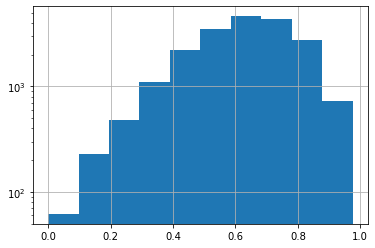

In [112]:
df['Danceability'].hist(log=True)

In [117]:
df_features['Danceability'] = df['Danceability']
mat = df_features.corr()

In [127]:
mat['Danceability']

Energy              0.234638
Loudness            0.353343
Speechiness         0.214938
Acousticness       -0.276924
Instrumentalness   -0.317689
Liveness           -0.083794
Valence             0.463827
Tempo              -0.065041
Danceability        1.000000
Name: Danceability, dtype: float64

У меня есть предположение, что фактор, насколько под трек удобно танцевать, зависит от совокупности характеристик музыки - энергичность, громкость, акустичность и тд. 
Однако сильной корреляции между признаком Danceability и остальными я не наблюдаю. Возможно, тут надо рассматривать все факторы в совокупности (как раз это я и хочу сделать дальше) 